### Initialize the environment

In [71]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/OV_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [73]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import main

### Load the experiment results

In [94]:
run=1
date_time='2017-02-20_1532' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run_dir=run_dir_prefix+date_time
runfile='Exp_%s_run_%s.npz' % (date_time, run) # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

### Configuration of the experiment

In [95]:
config

{u'dbns': {u'DM': {u'batchSize': 5,
   u'datafile': u'TCGA_Data/3.Methylation_0.5.out',
   u'epochs': [20, 800],
   'inputNodes': 15418,
   u'k': 1,
   u'lambdas': [0.0, 1.0],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.1],
   u'persistent': False},
  u'GE': {u'batchSize': 5,
   u'datafile': u'TCGA_Data/3.GE1_0.5.out',
   u'epochs': [20, 800],
   'inputNodes': 16046,
   u'k': 1,
   u'lambdas': [0.0, 0.01],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.01],
   u'persistent': True},
  u'ME': {u'batchSize': 5,
   u'datafile': u'TCGA_Data/3.miRNA_0.5.out',
   u'epochs': [20],
   'inputNodes': 799,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.0005],
   u'persistent': True}},
 u'p': 1.0,
 u'pathways': [u'ME', u'GE', u'DM'],
 u'runs': 2,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 120,
  u'k': 5,
  u'layersNodes': [24, 3],
  u'lr': [0.005, 0.01],
  u'persistent': True},
 u'uuid': u'efac6dcb3426fe7b25e108c418b

### Load the dataset and visualize the input of the pathways

In [96]:
datafiles = main.prepare_TCGA_datafiles("OV",config,data_dir)

### Look at the joint layer representation

In [97]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

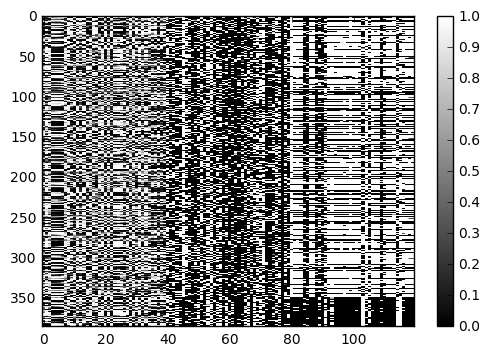

In [98]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
plt.imshow(joint_layer, interpolation='none', cmap='gray')
plt.axis('tight')
plt.colorbar()

In [99]:
joint_layer[1:10,1:10]

array([[  8.00227880e-01,   9.90284741e-01,   5.90227723e-01,
          7.32253730e-01,   8.90953362e-01,   9.53326166e-01,
          9.19380605e-01,   4.28707135e-04,   7.55908666e-03],
       [  4.05899100e-02,   4.84982692e-02,   9.01411831e-01,
          7.98206210e-01,   7.87028611e-01,   7.40319252e-01,
          3.68807614e-02,   9.90119934e-01,   9.98264074e-01],
       [  2.44142115e-01,   1.46728205e-02,   3.56707662e-01,
          3.12754899e-01,   3.35780591e-01,   1.09354012e-01,
          1.93057597e-01,   9.94473338e-01,   8.79146516e-01],
       [  9.95562673e-01,   7.45789766e-01,   3.43587925e-03,
          6.08039182e-03,   4.53301892e-03,   5.96667407e-03,
          9.17092025e-01,   9.87335861e-01,   1.40786827e-01],
       [  8.39423090e-02,   5.23967206e-01,   9.42810714e-01,
          9.38241661e-01,   9.35801923e-01,   9.50216115e-01,
          1.91024855e-01,   2.33312398e-01,   9.82500911e-01],
       [  9.06153738e-01,   9.91569400e-01,   5.99439204e-01,
   

### Check the weights distributions

([array([  0.00000000e+00,   8.00000000e+00,   2.70000000e+02,
           2.34800000e+03,   6.52900000e+03,   5.40900000e+03,
           1.37700000e+03,   1.04000000e+02,   1.00000000e+00,
           0.00000000e+00]),
  array([    0.,     0.,   151.,  2453.,  7141.,  5311.,   955.,    35.,
             0.,     0.]),
  array([    0.,     9.,   332.,  2842.,  6586.,  5069.,  1146.,    62.,
             0.,     0.]),
  array([  0.00000000e+00,   9.00000000e+00,   3.34000000e+02,
           2.73500000e+03,   6.76900000e+03,   4.96000000e+03,
           1.13700000e+03,   1.00000000e+02,   2.00000000e+00,
           0.00000000e+00]),
  array([    0.,    16.,   403.,  2955.,  6433.,  4520.,  1429.,   265.,
            25.,     0.]),
  array([  0.00000000e+00,   1.60000000e+01,   4.53000000e+02,
           2.95100000e+03,   6.49200000e+03,   4.77500000e+03,
           1.26000000e+03,   9.80000000e+01,   1.00000000e+00,
           0.00000000e+00]),
  array([    0.,    15.,   366.,  2620.,  6099

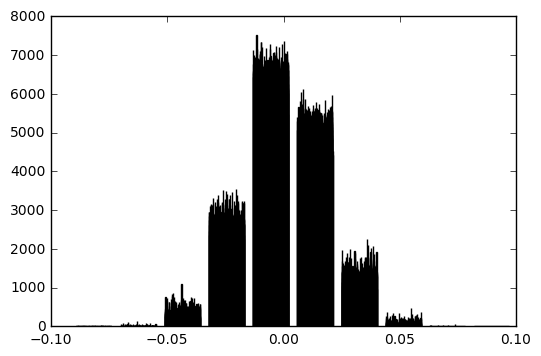

In [100]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x118183b50>,
 <a list of 3 Text xticklabel objects>)

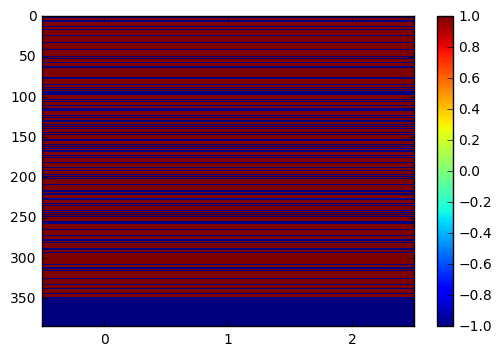

In [101]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x117d85a50>,
 <a list of 3 Text xticklabel objects>)

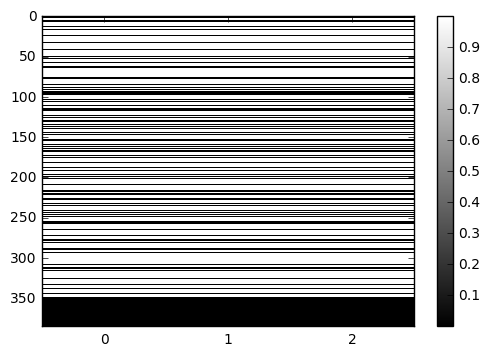

In [102]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0],cmap='gray')
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 144.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  241.]),
  array([ 144.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  241.]),
  array([ 144.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  241.])],
 array([  1.96456940e-09,   9.99938148e-02,   1.99987628e-01,
          2.99981440e-01,   3.99975253e-01,   4.99969066e-01,
          5.99962879e-01,   6.99956692e-01,   7.99950505e-01,
          8.99944318e-01,   9.99938130e-01]),
 <a list of 3 Lists of Patches objects>)

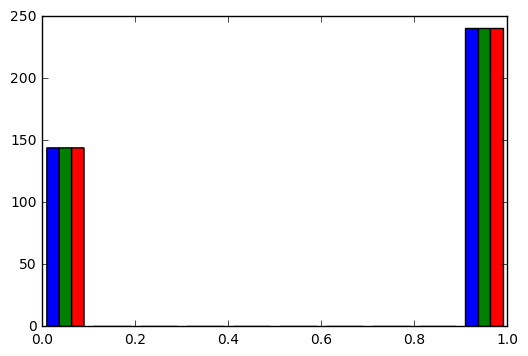

In [103]:
plt.hist(top_output)

In [104]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [105]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

(array([ 144.,  241.]), array([-0.5,  0.5,  1.5]), <a list of 2 Patch objects>)

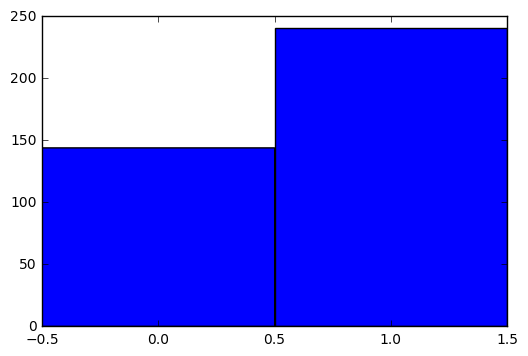

In [106]:
max_cl = np.max(cl)
plt.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))

Check Survival curves for the different classes
===============================================

In [107]:
import csv
id=[]
with open('../data/'+datafiles['ME']) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [108]:
stat={}
with open('../data/TCGA_Data/data_bcr_clinical_data_patient.csv') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        patient_id=row[1]
        stat[patient_id]=(row[15],row[16],row[17])

In [109]:
import re
time_list = []
event_list = []
group_list = []
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(1)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(0)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
TCGA-24-0981
No data for TCGA-04-1519
No data for TCGA-04-1360
TCGA-01-0639
TCGA-01-0642
No data for TCGA-04-1357
TCGA-01-0628
TCGA-04-1331
TCGA-01-0636
TCGA-01-0633
TCGA-01-0637
TCGA-01-0631
TCGA-01-0630


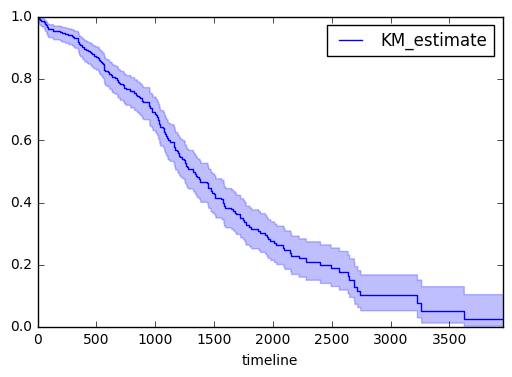

In [110]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

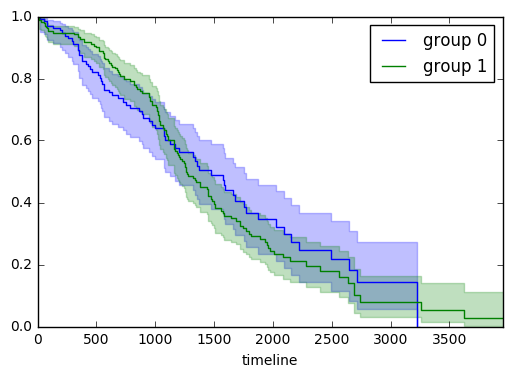

In [112]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in [1]:
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)